In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
horses = pd.read_csv('runs.csv')

In [3]:
races = pd.read_csv('races.csv')

In [4]:
horses.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [5]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [6]:
combineddf = pd.merge(horses,races, on='race_id')
combineddf

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN


Exploring the Data: What Trends Can We See?

How important is the horse's stats/form in determining the winner?

In [7]:
winsdf = horses.groupby('horse_id')

In [8]:
winsdf.apply(sum)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
horse_id,,,,,,,,,,,,,,,,,,,,,
0,196857,237,0,237,4.0,161.50,182,GBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGBGB...,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,2435,...,910.73,928.48,819.02,76.45,0.0,3685.25,860.0,173.2,2827,2341
1,129433,194,26,198,1.0,160.50,79,NZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZ...,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,1122,...,596.93,630.62,592.36,25.06,25.5,2421.75,816.8,274.5,1174,2778
2,108375,203,66,191,2.0,105.65,99,IREIREIREIREIREIREIREIREIREIREIREIREIREIREIREI...,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,1980,...,739.12,765.19,665.30,23.35,0.0,2730.38,647.7,148.7,231,2826
3,11603,23,9,35,0.0,34.25,9,NZNZNZ,GeldingGeldingGelding,180,...,66.15,71.51,24.93,0.00,0.0,214.45,255.0,59.0,492,326
4,112394,282,116,234,1.0,139.25,87,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,1740,...,668.15,692.40,343.09,72.70,0.0,2427.56,849.8,226.1,3973,1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,28220,133,79200,135,3.0,98.25,54,NZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZNZ,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,1080,...,409.34,428.05,382.04,24.20,0.0,1605.23,644.8,180.5,2118,1360
4401,19003,104,57213,108,0.0,76.50,39,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUS,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,780,...,300.62,308.98,170.51,0.00,0.0,1058.00,270.0,69.1,494,881
4402,69208,164,136462,190,5.0,119.35,93,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,GeldingGeldingGeldingGeldingGeldingGeldingGeld...,1860,...,690.35,721.12,0.00,0.00,0.0,2054.47,674.8,142.6,217,3249


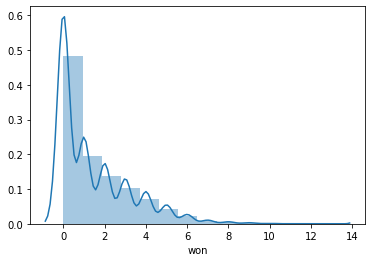

In [9]:
sns.distplot(winsdf.apply(sum)['won'],bins = 14)

In [10]:
combineddf['won_previous'] = 0

In [11]:
horses[horses['horse_id']==4404].iloc[0,5]

5.0

In [12]:
horses.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [13]:
horses[horses['horse_id'] == 3917]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
909,75,2,3917,14,0.0,5.50,3,AUS,Gelding,60,...,22.56,23.88,24.22,NaN,NaN,84.56,21.0,10.0,118,69
1547,125,4,3917,7,0.0,3.25,3,AUS,Gelding,60,...,22.85,24.69,25.10,23.92,NaN,110.92,17.0,6.9,118,69
2065,165,4,3917,2,0.0,1.50,3,AUS,Gelding,60,...,22.69,24.62,26.06,24.90,NaN,112.28,14.0,4.3,118,2
2497,199,3,3917,1,1.0,0.00,3,AUS,Gelding,60,...,23.86,25.51,26.68,25.20,23.90,139.90,3.5,1.6,118,2
2961,236,11,3917,8,0.0,3.50,3,AUS,Gelding,60,...,25.08,24.87,23.32,NaN,NaN,102.19,5.5,1.8,118,69
3246,258,12,3917,3,0.0,2.75,3,AUS,Gelding,60,...,25.07,25.02,23.48,23.79,NaN,124.23,13.0,3.4,118,57
3603,286,11,3917,6,0.0,2.25,3,AUS,Gelding,60,...,23.40,25.34,24.69,24.60,NaN,112.15,10.0,2.6,118,154
3922,312,11,3917,10,0.0,4.75,3,AUS,Gelding,60,...,24.88,24.96,23.98,24.36,NaN,125.04,3.3,1.5,118,2
4261,339,7,3917,5,0.0,5.50,3,AUS,Gelding,60,...,23.24,24.74,24.62,23.61,NaN,110.71,9.5,2.6,118,57


In [14]:
sorteddf = horses.sort_values(by=['horse_id','race_id'])
sorteddf

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
42543,3396,10,0,10,0.0,4.00,3,GB,Gelding,65,...,24.19,22.70,NaN,NaN,NaN,72.08,34.0,10.0,63,21
43723,3489,11,0,9,0.0,4.00,3,GB,Gelding,65,...,22.75,23.01,NaN,NaN,NaN,70.62,76.0,11.0,63,40
47509,3794,1,0,14,0.0,9.25,3,GB,Gelding,60,...,22.83,23.61,NaN,NaN,NaN,71.29,39.0,8.7,73,21
48016,3835,3,0,12,0.0,10.00,3,GB,Gelding,58,...,22.88,23.87,NaN,NaN,NaN,71.43,99.0,22.0,73,40
48647,3886,5,0,4,0.0,1.50,3,GB,Gelding,55,...,24.42,23.87,23.61,NaN,NaN,96.74,36.0,9.2,73,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39882,3187,6,4404,10,0.0,6.25,3,AUS,Gelding,60,...,23.72,25.52,24.23,NaN,NaN,102.50,9.8,2.5,80,77
40320,3222,7,4404,8,0.0,6.00,3,AUS,Gelding,60,...,25.70,24.62,23.23,NaN,NaN,103.24,19.0,5.3,80,105
41852,3343,5,4404,6,0.0,3.75,3,AUS,Gelding,60,...,23.44,25.77,24.53,NaN,NaN,101.92,23.0,5.2,80,91
42307,3378,8,4404,1,1.0,0.00,3,AUS,Gelding,60,...,24.33,24.49,23.82,NaN,NaN,100.88,4.5,1.9,80,118


In [15]:
sorteddf['won_previous'] = 5

In [16]:
for i in range(79447):
    if sorteddf.iloc[i,2] == sorteddf.iloc[(i-1),2]:
        sorteddf.iloc[i,37] = sorteddf.iloc[i-1,4]
    else:
        sorteddf.iloc[i,37] = np.NaN

In [17]:
sorteddf[sorteddf['won_previous']==5]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id,won_previous


In [18]:
sorteddf['won2_previous']=5

In [19]:
for i in range(79447):
    if sorteddf.iloc[i,2] == sorteddf.iloc[(i-1),2]:
        sorteddf.iloc[i,38] = sorteddf.iloc[i-1,37] + sorteddf.iloc[i,37]
    else:
        sorteddf.iloc[i,38] = np.NaN

In [20]:
sorteddf['won3_previous']=5

In [21]:
for i in range(79447):
    if sorteddf.iloc[i,2] == sorteddf.iloc[(i-1),2]:
        sorteddf.iloc[i,39] = sorteddf.iloc[i-1,38] + sorteddf.iloc[i,37]
    else:
        sorteddf.iloc[i,39] = np.NaN

In [22]:
sorteddf.head(50)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id,won_previous,won2_previous,won3_previous
42543,3396,10,0,10,0.0,4.00,3,GB,Gelding,65,...,NaN,NaN,72.08,34.0,10.0,63,21,NaN,NaN,NaN
43723,3489,11,0,9,0.0,4.00,3,GB,Gelding,65,...,NaN,NaN,70.62,76.0,11.0,63,40,0.0,NaN,NaN
47509,3794,1,0,14,0.0,9.25,3,GB,Gelding,60,...,NaN,NaN,71.29,39.0,8.7,73,21,0.0,0.0,NaN
48016,3835,3,0,12,0.0,10.00,3,GB,Gelding,58,...,NaN,NaN,71.43,99.0,22.0,73,40,0.0,0.0,0.0
48647,3886,5,0,4,0.0,1.50,3,GB,Gelding,55,...,NaN,NaN,96.74,36.0,9.2,73,177,0.0,0.0,0.0
49402,3944,8,0,10,0.0,5.50,3,GB,Gelding,55,...,NaN,NaN,96.87,14.0,3.0,73,177,0.0,0.0,0.0
50195,4008,6,0,8,0.0,4.75,3,GB,Gelding,53,...,NaN,NaN,101.93,13.0,3.2,73,64,0.0,0.0,0.0
50553,4037,7,0,3,0.0,1.00,3,GB,Gelding,51,...,NaN,NaN,96.68,32.0,7.9,73,64,0.0,0.0,0.0
51482,4112,9,0,2,0.0,1.00,4,GB,Gelding,51,...,NaN,NaN,95.94,17.0,4.4,73,64,0.0,0.0,0.0
52294,4177,8,0,14,0.0,13.00,4,GB,Gelding,52,...,25.31,NaN,111.58,7.9,2.7,73,64,0.0,0.0,0.0


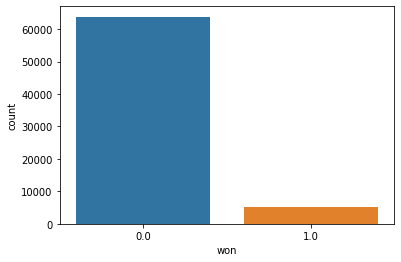

In [23]:
sns.countplot(x = 'won', data = sorteddf[sorteddf['won_previous']==0])

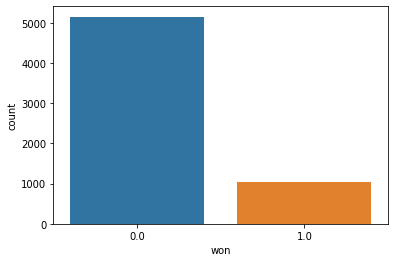

In [24]:
sns.countplot(x = 'won', data = sorteddf[sorteddf['won_previous']==1])

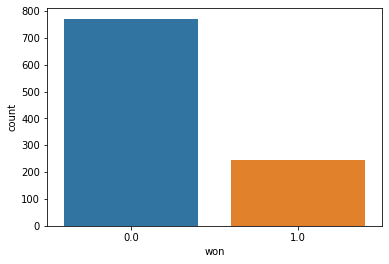

In [25]:
sns.countplot(x = 'won',data = sorteddf[sorteddf['won2_previous']==2])

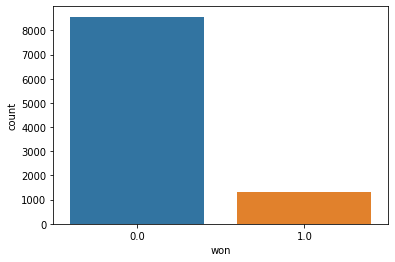

In [26]:
sns.countplot(x = 'won', data = sorteddf[sorteddf['won2_previous']==1])

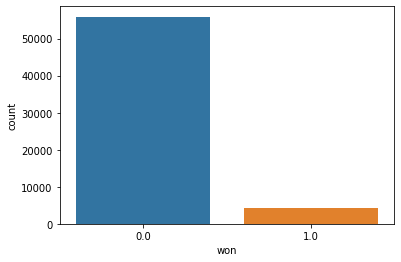

In [27]:
sns.countplot(x = 'won', data = sorteddf[sorteddf['won2_previous']==0])

Definite correlation between winning previous races and winning current races

In [28]:
combineddf = pd.merge(sorteddf,races, on='race_id')

In [29]:
combineddf['won_previous']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
79442    NaN
79443    1.0
79444    0.0
79445    0.0
79446    NaN
Name: won_previous, Length: 79447, dtype: float64

In [30]:
combineddf.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1_x',
       'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x', 'finish_time',
       'win_odds', 'place_odds', 'trainer_id', 'jockey_id', 'won_previous',
       'won2_previous', 'won3_previous', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5',
       'sec_time6', 'sec_time7', 'time1_y', 'time2_y', 'time3_y', 'time4_y',
       'time5_y', 'time6_y', 'time7', 'place_combination1',
       'place_combination2', 'place_combination

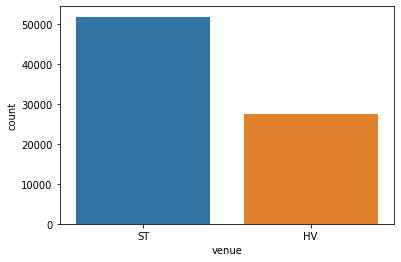

In [39]:
sns.countplot(x='venue',data=combineddf)

In [43]:
#number each of the categorical columns
horse_countrydf = pd.get_dummies(combineddf['horse_country'],drop_first=True)
combineddf = pd.concat([combineddf,horse_countrydf],axis=1)
horse_typedf = pd.get_dummies(combineddf['horse_type'],drop_first=True)
combineddf = pd.concat([combineddf,horse_typedf],axis=1)
config_df = pd.get_dummies(combineddf['config'],drop_first=True)
combineddf = pd.concat([combineddf,config_df],axis=1)
venue_df = pd.get_dummies(combineddf['venue'],drop_first=True)
combineddf = pd.concat([combineddf,venue_df],axis=1)
surface_df = pd.get_dummies(combineddf['surface'],drop_first=True)
combineddf = pd.concat([combineddf,surface_df],axis=1)
going_df = pd.get_dummies(combineddf['going'],drop_first=True)
combineddf = pd.concat([combineddf,venue_df],axis=1)
combineddf

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
0,3396,10,0,10,0.0,4.00,3,GB,Gelding,65,...,0,0,0,0,0,0,0,1,0,1
1,3396,5,284,7,0.0,3.25,3,IRE,Gelding,60,...,0,0,0,0,0,0,0,1,0,1
2,3396,4,337,2,0.0,1.25,3,IRE,Gelding,60,...,0,0,0,0,0,0,0,1,0,1
3,3396,11,661,13,0.0,5.25,3,NZ,Gelding,64,...,0,0,0,0,0,0,0,1,0,1
4,3396,9,1045,3,0.0,1.75,3,GB,Gelding,60,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,5914,7,3180,6,0.0,8.00,3,AUS,Colt,60,...,0,0,0,1,0,0,0,1,0,1
79443,5914,1,3941,2,0.0,0.25,3,IRE,Gelding,100,...,0,0,0,1,0,0,0,1,0,1
79444,5914,2,4183,3,0.0,1.00,3,IRE,Gelding,100,...,0,0,0,1,0,0,0,1,0,1
79445,5914,5,4335,1,1.0,0.00,2,AUS,Gelding,100,...,0,0,0,1,0,0,0,1,0,1
